Walmart is a company founded by Sam Walton in 1962. It is one of the world's largest companies, behind Exxon Mobil. Walmart stores are large department stores that sell many different things. There are more than 8,000 Wal-Mart stores around the world, and over 2 million people work for Walmart

It can be summarized as “helping people around the world save money and live better – anytime and anywhere – in retail stores and through eCommerce.” While its vision is to “make every day easier for busy families.” Walmart defines “busy families” as the bull’s eye of its business strategy

Task is to analyze  the sales forecasting of  walmart with the data given. (eg: anaglysing weekly sales, which store or department sells most etc.)

In [1]:
##Importing important libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from google.colab import files


In [2]:
##Inserting all the data used for the analysis 

print('Upload training data')
uploaded = files.upload()
print('Upload test data')
uploaded = files.upload()
print('Upload feature data ')
uploaded = files.upload()
print('Upload store data ')
uploaded = files.upload()

Upload training data


Saving Training Data.csv to Training Data.csv
Upload test data


Saving Test data.csv to Test data.csv
Upload feature data 


Saving Features Data.csv to Features Data.csv
Upload store data 


Saving Store Data.csv to Store Data.csv


In [3]:
##Reading csv file as dataframes(df)

test_df = pd.read_csv('Test data.csv')

In [4]:
##Reading csv file as dataframes(df)

train_df = pd.read_csv('Training Data.csv')


In [5]:
##Reading csv file as dataframes(df)

stores_df = pd.read_csv('Store Data.csv')

In [6]:
##Reading csv file as dataframes(df)

features_df=pd.read_csv('Features Data.csv')

In [7]:
##top 5 rows of train data

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
##Describe the data in train_df

train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
## This shows how many null values each column in the data frame has
##we can see that there are no null values in any columns of the data frame.
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [11]:
##top 5 rows of test data 

test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [12]:
##coulumns present in the test data 

test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [13]:
##Describe the data in test_df

test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [14]:
## This shows how many null values each column in the data frame has
##we can see that there are no null values in any columns of the data frame.

test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [15]:
##top 5 rows of features dataframe

features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
##whole information of the df

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [17]:
##Describe the data in test_df

features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [18]:
## Finding out about the null values in each column.

features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [19]:
##Describe the data in store_df

stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [20]:
## This shows how many null values each column in the data frame has
##we can see that there are no null values in any columns of the data frame.

stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [21]:
##Create a new data frame by merging (inner) features data frame to stores data frame on Store for analysis purpose.
##top 5 rows of that merged df
dataset_m = features_df.merge(stores_df, how= 'inner', on = 'Store')
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [22]:
##whole information of the merged df

dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [23]:
from datetime import datetime
#converting date to date time object
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
#Extract week and year from the date and make them into new columns.
dataset_m['week'] = dataset_m.Date.dt.isocalendar().week
dataset_m['year'] = dataset_m.Date.dt.isocalendar().year

In [24]:
##last 5 rows of the df
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


In [25]:
##Creating a new df by merging (inner) the train_df and the new data frame dataset_m on store,
## date and IsHoliday columns and sorting the values by Store, department and date.

train_df_1 = train_df.merge(dataset_m, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [26]:
##top 5 rows of the df
train_df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [27]:
##Defining a function scatter to plot the scatter plot with the data of the 
##column specified as the function parameter in x axis and weekly sales as the y values.

##SCATTER PLOT

def scatter(train_df_1, column):
    #plot the figure
    plt.figure()
    #plot the scatter plot with data from the specified column in x axis and weekly sales in y axis
    plt.scatter(train_df[column], train_df['Weekly_Sales'])
    #give y label as weekly_sales
    plt.ylabel('Weekly_Sales')
    #Give the xlabel as the column specified as parameter in the function
    plt.xlabel(column)

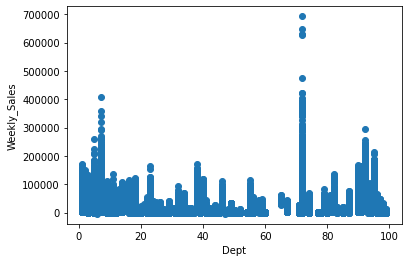

In [28]:
#plot a scatter plot using the scatter function a scatter plot of weekly sales with respect to Department
scatter(train_df_1, 'Dept')

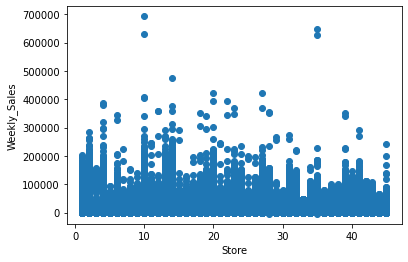

In [29]:
#plot a scatter plot using the scatter function a scatter plot of weekly sales with respect to Store
scatter(train_df_1, 'Store')

#####3 line plots for weekly sales for eact year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


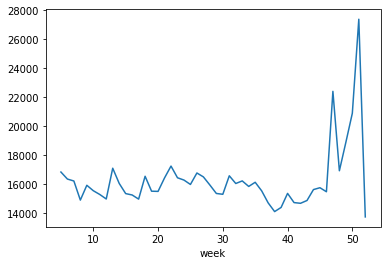

In [30]:
#Filtering out mean weekly sales for the year 2010
weekly_sales_2010 = train_df_1[train_df_1['year'] ==  2010]['Weekly_Sales'].groupby(train_df_1['week']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


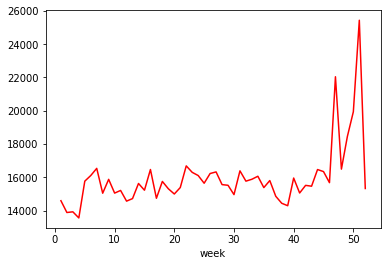

In [31]:
#Filtering out mean weekly sales for the year 2011
weekly_sales_2011 = train_df_1[train_df_1['year'] ==  2011]['Weekly_Sales'].groupby(train_df_1['week']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


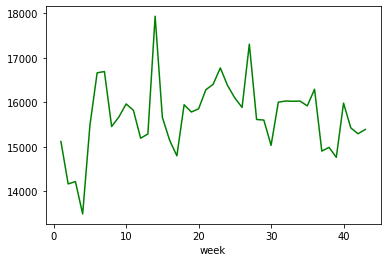

In [32]:
#Filtering out mean weekly sales for the year 2012
weekly_sales_2012 = train_df_1[train_df_1['year'] ==  2012]['Weekly_Sales'].groupby(train_df_1['week']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


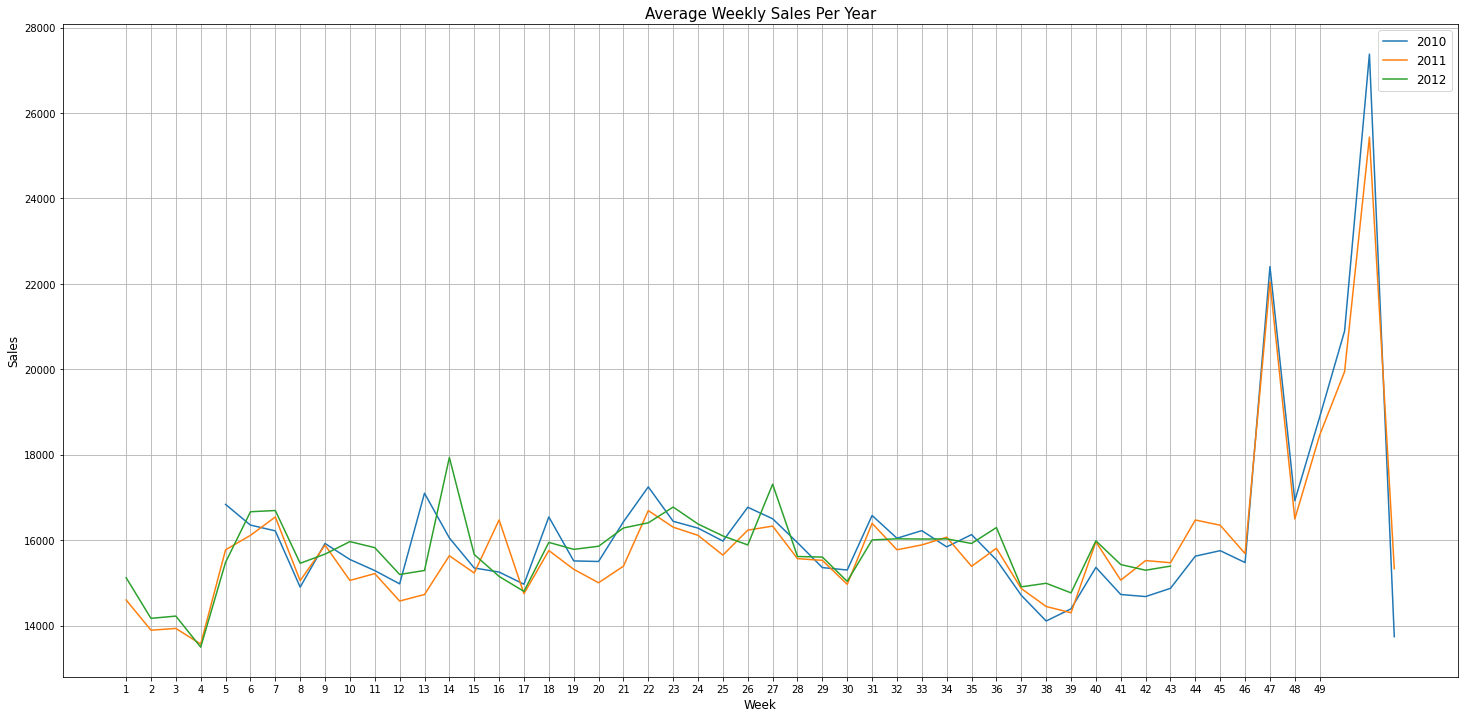

In [33]:
###Combined line plots for each year (2010,2011,2012)


#plotting a figure 
plt.figure(figsize= (25, 12))
#Plotting three line plots for weekly sales for each year
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
#plot labels and legends
plt.xticks(np.arange(1,50, step= 1))
plt.title('Average Weekly Sales Per Year', fontsize = 15)
plt.xlabel('Week', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.legend(['2010', '2011','2012'], loc = 'best', fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


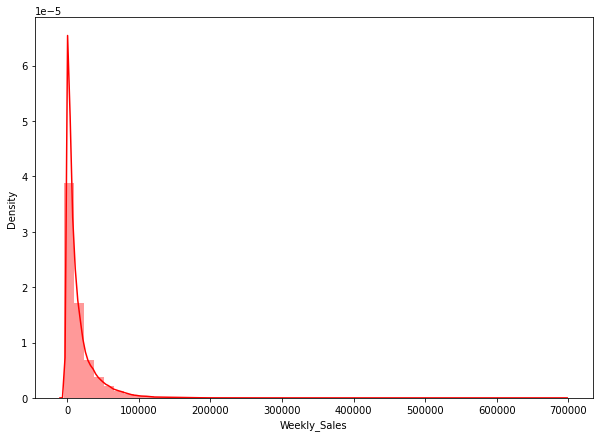

In [34]:
##Histogram / Normal Distribution

f, ax = plt.subplots(figsize=(10, 7))
#Creating a distribution for weekly sales in the dataframe train_df
sns.distplot(train_df['Weekly_Sales'],color='r')

#Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

#Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers


In [35]:
#Skewness 

print("Skewness: ", train_df['Weekly_Sales'].skew()) #skewness

#Kurtosis 

print("Kurtosis: ", train_df['Weekly_Sales'].kurt()) #kurtosis

Skewness:  3.2620081854656657
Kurtosis:  21.49128990832619


The above code is to determine the skew and kurtosis of the normal distribution.

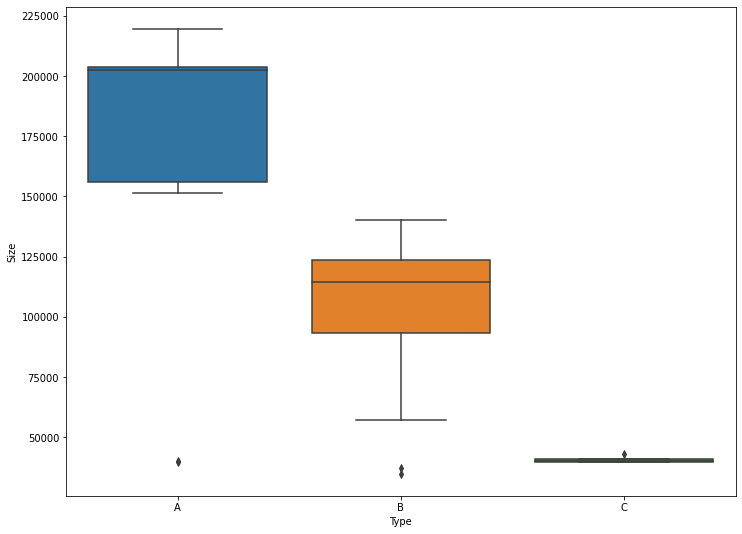

In [36]:
#Box Plot

#concatinating the type and column from store_df together to find the relation between stores falling under each type and size.
data = pd.concat([stores_df['Type'], stores_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(12, 9))
#Plot a box plot to understand the relation between type and size of stores.
fig = sns.boxplot(x='Type', y='Size', data=data)

From the above box plots we can see that Type A plots are the largest, ie has the largest size

In [37]:
##Bar Chart On Data Frame

weekly_sales_store = train_df['Weekly_Sales'].groupby(train_df['Store']).mean()

Grouping the train_df by store and computing the mean of weekly_sales for each store.

In [38]:
##TOP 5 rows 
##visualise the data

weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [39]:
##last 5 rows of the weekly sales store

weekly_sales_store.tail()

Store
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [40]:
##Converting the data to a pandas dataframe

weekly_sales_store_df=pd.DataFrame(weekly_sales_store)

##Sorting the data frame with respect to weekly sales in Descending order and plotting a var graph on the data frame itself to get a idea about the data.


In [41]:
weekly_sales_store_df.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


Store number 20 has the highest weekly sales (20508.301592)

Sorting the data frame with respect to weekly sales in Ascending order and plotting a var graph on the data frame itself to get a idea about the data.


In [42]:
weekly_sales_store_df.sort_values("Weekly_Sales").style.bar(align='left',width=98,color='#ff00bf')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


We can see that Store number 5 has the least weekly sales (5053.415813)

Plotting a bar graph with store number as x values and mean weekly sales for that store as the y values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


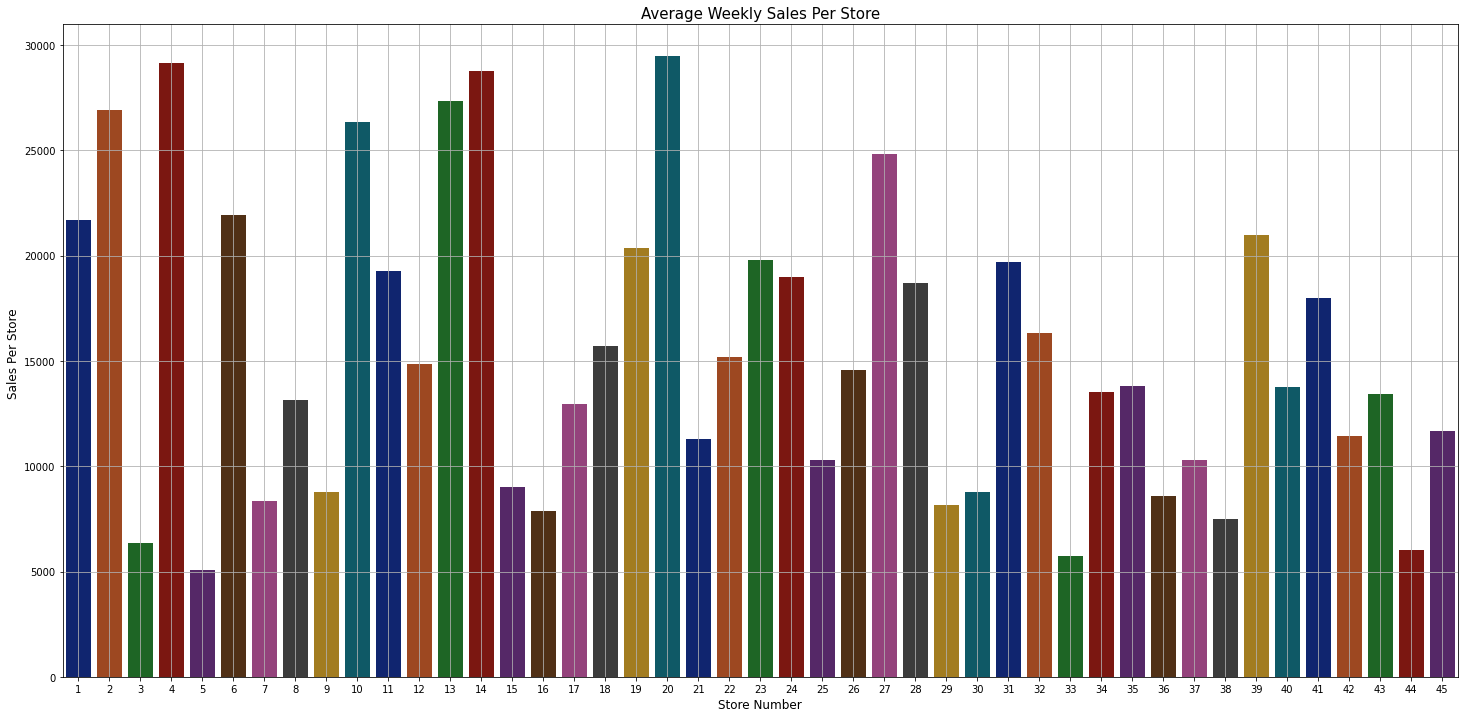

In [43]:
#Plotting the figure.
plt.figure(figsize= (25, 12))
#Creating a barplot with stores in x axis and mean weekly sales for each store as y values.
sns.barplot(weekly_sales_store.index, weekly_sales_store.values,palette='dark')
#plot a grid
plt.grid()
#Give title,x and y labels for the plot
plt.title('Average Weekly Sales Per Store', fontsize = 15)
plt.xlabel('Store Number', fontsize = 12)
plt.ylabel('Sales Per Store ', fontsize = 12)
plt.show()

We can see that this plot is a great way to analyse how each store is performing sales wise.

From the plot we can see that store number 20 has the highesst mean weekly sales, followed by store 4 and then store 14.

In [44]:
#Grouping the train_df by Department and computing the mean of weekly_sales for each Department.

weekly_sales_Dept = train_df['Weekly_Sales'].groupby(train_df['Dept']).mean()

In [45]:
##converting it to a pandas dataframe

weekly_sales_Dept_df= pd.DataFrame(weekly_sales_Dept)

In [46]:
weekly_sales_Dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


Sorting the data frame with respect to weekly sales in Descending order and plotting a var graph on the data frame itself to get a idea about the data.

In [47]:
weekly_sales_Dept_df.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#d65f5f')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


We can see that Department number 92 has the largest weekly sales.

Sorting the data frame with respect to weekly sales in Ascending order and plotting a var graph on the data frame itself to get a idea about the data.

In [48]:
weekly_sales_Dept_df.sort_values("Weekly_Sales").style.bar(align='left',width=98,color='#bfff00')

,Weekly_Sales
Dept,
47,-7.682554
43,1.193333
78,7.296638
39,11.123750
51,21.931729
45,23.211586
54,108.305985
77,328.961800
60,347.370229


Department 47 has a cumulative negative value for weekly sales followed by department 43 which has a very low weekly sale of 1.193333

Plotting a bar graph with Department number as x values and mean weekly sales for that store as the y values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


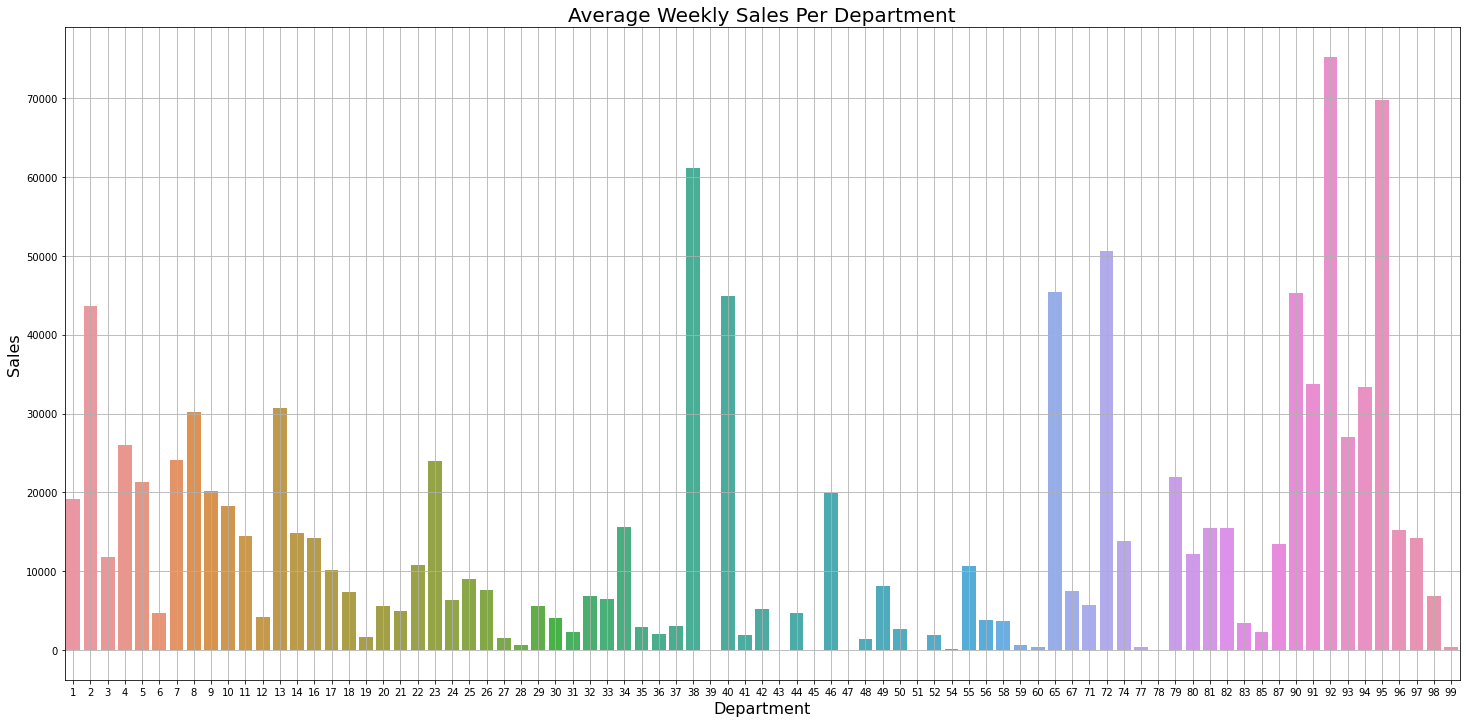

In [49]:
#Plot a figure
plt.figure(figsize= (25, 12))
#Creating a barplot with department in x axis and mean weekly sales for each store as y values.
sns.barplot(weekly_sales_Dept.index, weekly_sales_Dept.values)
#plot a grid
plt.grid()
#Give title,x and y labels for the plot
plt.title('Average Weekly Sales Per Department', fontsize = 20)
plt.xlabel('Department', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

We can see that weekly sales is highest for department 92.

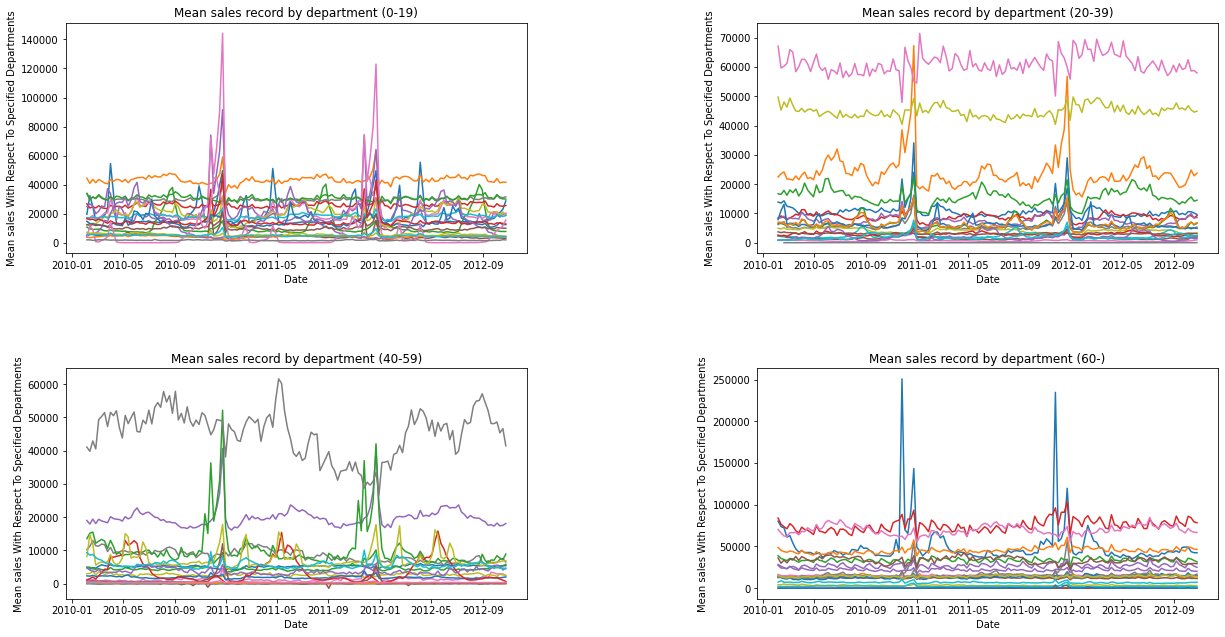

In [50]:
##Creating line plots of mean weekly sales for each department in the dataframe.



#Creating a data frame grouped by grouping the train_df on department and date.
grouped=train_df.groupby(['Dept','Date']).mean().reset_index()

#Filtering out Department, Date, Weekly sales from the new data frame grouped.
data=grouped[['Dept','Date','Weekly_Sales']]

#Finding out unique values in the department column.
dept=train_df['Dept'].unique()
#Sort the unique values in the column
dept.sort()
#Divide the departments into 4 batches
dept_1=dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]

#Create subplots with 2 rows and 2 columns and adjusting the spacing between the subplots.
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


#For each batch containg departments and for each department in each batch plot the weekly sales in accordance with date.
for i in dept_1 :
    data_1=data[data['Dept']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')

for i in dept_2 :
    data_1=data[data['Dept']==i]
    ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')
    
for i in dept_3 :
    data_1=data[data['Dept']==i]
    ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')    

for i in dept_4 :
    data_1=data[data['Dept']==i]
    ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')        
    
    
#Give each subplot a suitable title    
ax[0,0].set_title('Mean sales record by department (0-19)')
ax[0,1].set_title('Mean sales record by department (20-39)')
ax[1,0].set_title('Mean sales record by department (40-59)')
ax[1,1].set_title('Mean sales record by department (60-)')

#Give each Subplot y and x labels
ax[0,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,1].set_xlabel('Date')


plt.show()

The sales level is different by department

There is some peaked points around January and May, thus indicating high sales during those times.

We can see that departments and date are good features to predict the sales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


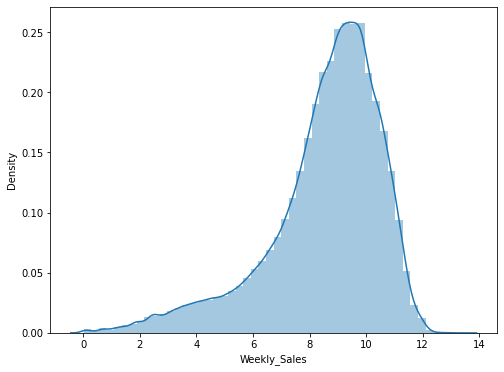

In [51]:
##Plotting the normal distribution where sales is greator than zero

#Data for sales over zero
train_over_zero_sales=train_df[train_df['Weekly_Sales']>0]
#Data for sales less than zero
train_below_zero_sales=train_df[train_df['Weekly_Sales']<=0]
#Natural log of data for sales over zero
sales_over_zero_sales = np.log1p(train_over_zero_sales['Weekly_Sales'])
#plotting a histogram and normal distribution for data with sales over zero.
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero_sales)

###Heatmap
Plotting a heatmap to determine the correlation between columns in the data frame.

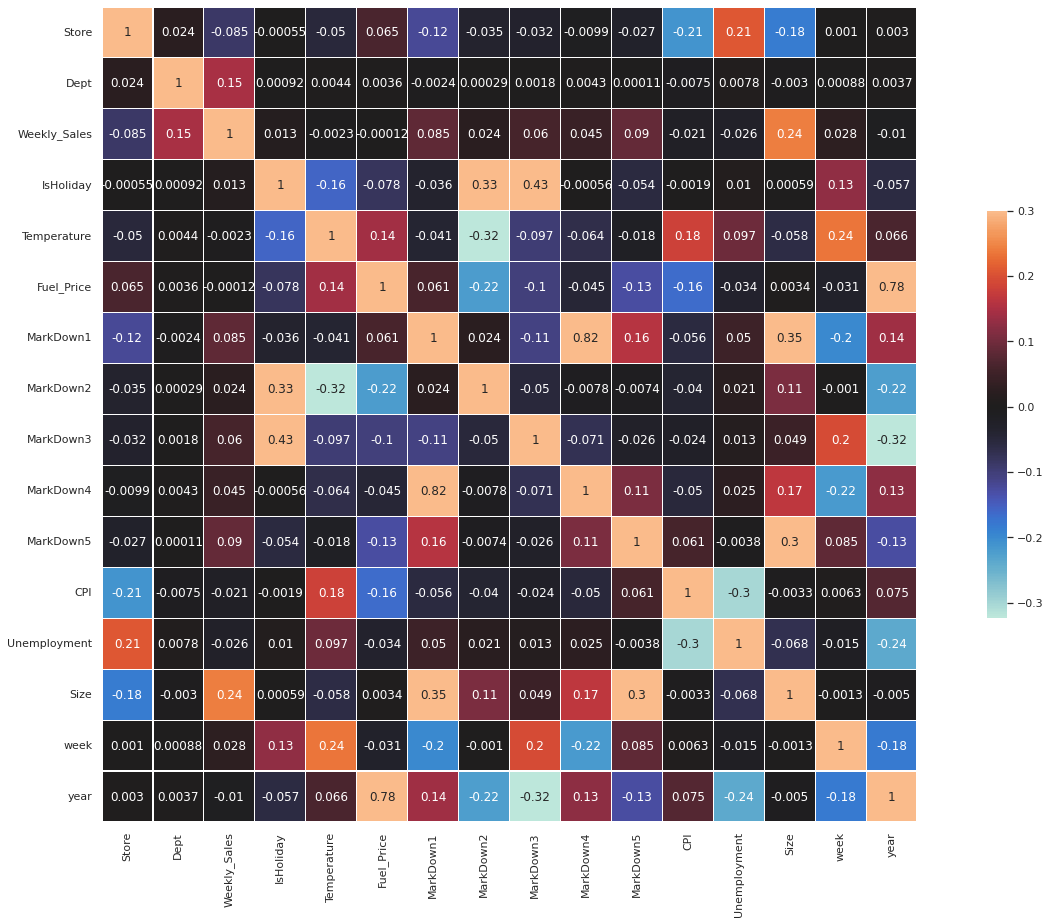

In [52]:
sns.set(style = 'white')


fig, ax = plt.subplots(figsize= (25, 15))
sns.heatmap(train_df_1.corr(), cmap = 'icefire', vmax = 0.3, center = 0, square = True, linewidth= 0.5, cbar_kws = {'shrink': 0.5}, annot = True)

##Skewness and Kurtosis

In [53]:
print("Skewness: ", sales_over_zero_sales.skew()) #skewness
print("Kurtosis: ", sales_over_zero_sales.kurt()) #kurtosis

Skewness:  -1.2011878481918052
Kurtosis:  1.5541238937236335
